In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
col=[var for var in df.columns if df[var].isna().mean()< .05 and df[var].isna().mean()>0]

In [13]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
df[col]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [7]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [29]:
new_df = df[col].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

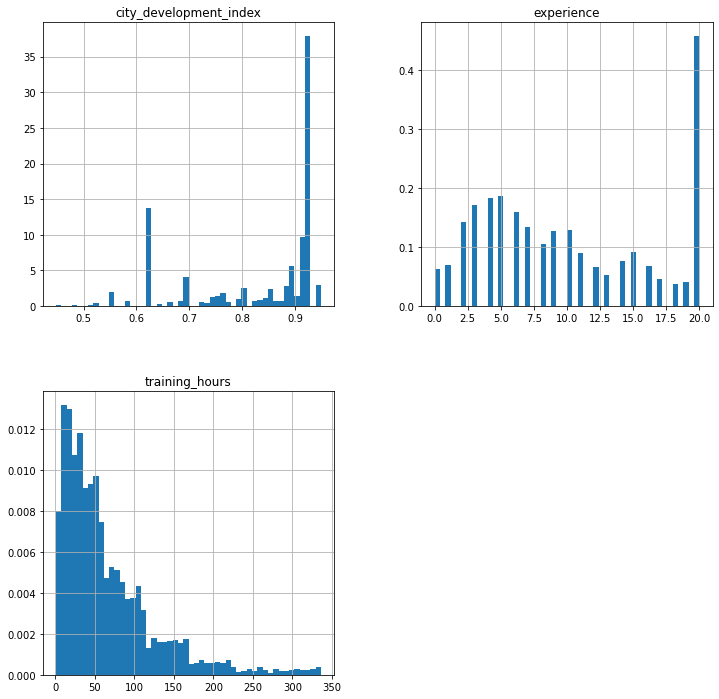

In [9]:
new_df.hist(bins=50,density=True,figsize=(12,12))

<AxesSubplot:>

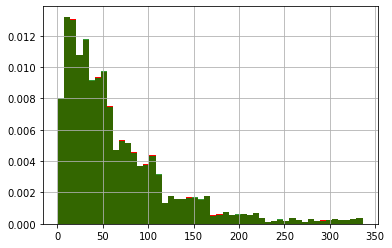

In [10]:
# original data
df['training_hours'].hist(bins=50, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, color='green', density=True,alpha=0.8 )


<AxesSubplot:ylabel='Density'>

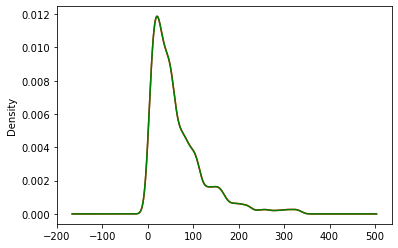

In [11]:
df["training_hours"].plot.density(color="red")
new_df["training_hours"].plot.density(color="green")


(array([  48.,  105.,  473., 2412.,  914.,  396.,  865.,  880., 2144.,
        8945.]),
 array([0.448 , 0.4981, 0.5482, 0.5983, 0.6484, 0.6985, 0.7486, 0.7987,
        0.8488, 0.8989, 0.949 ]),
 <BarContainer object of 10 artists>)

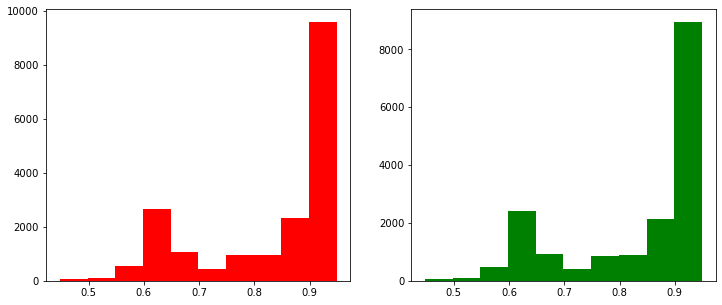

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.hist( df['city_development_index'],color="red")

ax2.hist( new_df['city_development_index'],color="green")
# # original data
# df['city_development_index'].hist(bins=50, density=True, color='red')

# # data after cca, the argument alpha makes the color transparent, so we can
# # see the overlay of the 2 distributions
# new_df['city_development_index'].hist(bins=50, color='green', density=True, alpha=0.8)

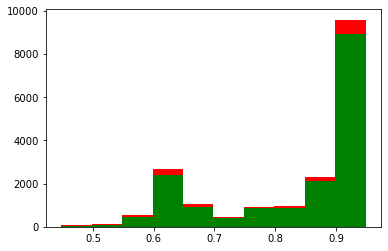

In [17]:
plt.hist(df['city_development_index'],color="red")

plt.hist(new_df['city_development_index'],color="green")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

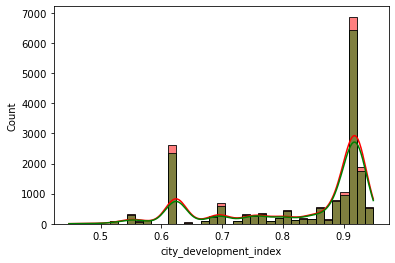

In [22]:
sns.histplot(df["city_development_index"],color="red",kde=True)
sns.histplot(new_df["city_development_index"],color="green",kde=True)

<AxesSubplot:ylabel='Density'>

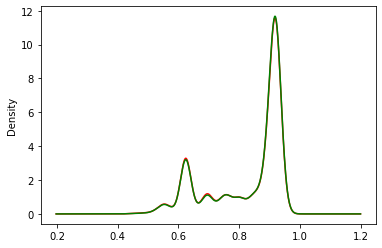

In [23]:
df["city_development_index"].plot.density(color="red")
new_df["city_development_index"].plot.density(color="green")

# Categorical data

In [26]:
df['enrolled_university'].value_counts() 

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [24]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp


,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [25]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
